# Module

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import tensorflow as tf

# Data

In [11]:
(X_train,y_train),(X_test,y_test) = tf.keras.datasets.mnist.load_data()

In [4]:
print('Shape of X train : ',X_train.shape)
print('Shape of y train : ',y_train.shape)
print('Shape of X test : ',X_test.shape)
print('Shape of y test : ',y_test.shape)

Shape of X train :  (60000, 28, 28)
Shape of y train :  (60000,)
Shape of X test :  (10000, 28, 28)
Shape of y test :  (10000,)


LeNet은 원래 (32,32) 크기를 입력으로 받습니다. 그래서 (28,28)에서 입력 형태를 변경시켜줍니다

In [12]:
# 크기 변경
X_train = tf.pad(X_train, [[0, 0], [2,2], [2,2]])
X_test = tf.pad(X_test, [[0, 0], [2,2], [2,2]])

In [14]:
# 정규화
X_train = X_train / 255
X_test = X_test / 255

사진은 0과255 사이의 pixel 값을 같습니다. 값이 커질수록 밝은 값을 의미합니다. 학습의 효율성을 위해 255로 나누어줌으로써 모든 값이 0~1 사이의 값을 갖도록 합니다.

위의 MNIST data의 경우에는 흑백이므로 차원은 1차원입니다. Pytorch의 경우에는 차원이 먼저 붙어서 (1,28,28)로 학습 및 추론을 진행하지만 tensorflow의 경우에는 (28,28,1)로 차원이 맨 뒤에 붙습니다

In [15]:
# Add channel
X_train = tf.expand_dims(X_train,axis=3)
X_test = tf.expand_dims(X_test,axis=3)

In [16]:
print('Shape of X train : ',X_train.shape)
print('Shape of X test : ',X_test.shape)

Shape of X train :  (60000, 32, 32, 1)
Shape of X test :  (10000, 32, 32, 1)


흑백 영상을 학습하실 때는 보통 맨 뒤에 1이 없이 불러와지니 꼭 차원을 추가하셔야 합니다

# 모형

In [19]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Conv2D(6,5,activation='tanh',input_shape=(32,32,1)))
model.add(tf.keras.layers.AveragePooling2D(2))
model.add(tf.keras.layers.Activation('sigmoid'))

model.add(tf.keras.layers.Conv2D(16,5,activation='tanh'))
model.add(tf.keras.layers.AveragePooling2D(2))
model.add(tf.keras.layers.Activation('sigmoid'))

model.add(tf.keras.layers.Conv2D(120,5,activation='tanh'))
model.add(tf.keras.layers.Flatten())

model.add(tf.keras.layers.Dense(84,activation='tanh'))
model.add(tf.keras.layers.Dense(10,activation='softmax'))

LeNet의 구조를 한 번 보시고 위 code를 보시는 것을 추천드립니다. 그리고 실제 LeNet에서는 마지막 분류층에 softmax를 사용하지 않고 통계 기법을 통해 분류를 진행합니다. 하지만 해당 방식의 경우에는 간소화하여 softmax layer로 구현하였습니다. 그리고 LeNet에서 사용하였던 분류층은 현재 자주 사용되지 않으니 넘어가셔도 될 것 같습니다

In [20]:
# 모형 요약
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 28, 28, 6)         156       
                                                                 
 average_pooling2d_6 (Averag  (None, 14, 14, 6)        0         
 ePooling2D)                                                     
                                                                 
 activation_6 (Activation)   (None, 14, 14, 6)         0         
                                                                 
 conv2d_10 (Conv2D)          (None, 10, 10, 16)        2416      
                                                                 
 average_pooling2d_7 (Averag  (None, 5, 5, 16)         0         
 ePooling2D)                                                     
                                                                 
 activation_7 (Activation)   (None, 5, 5, 16)         

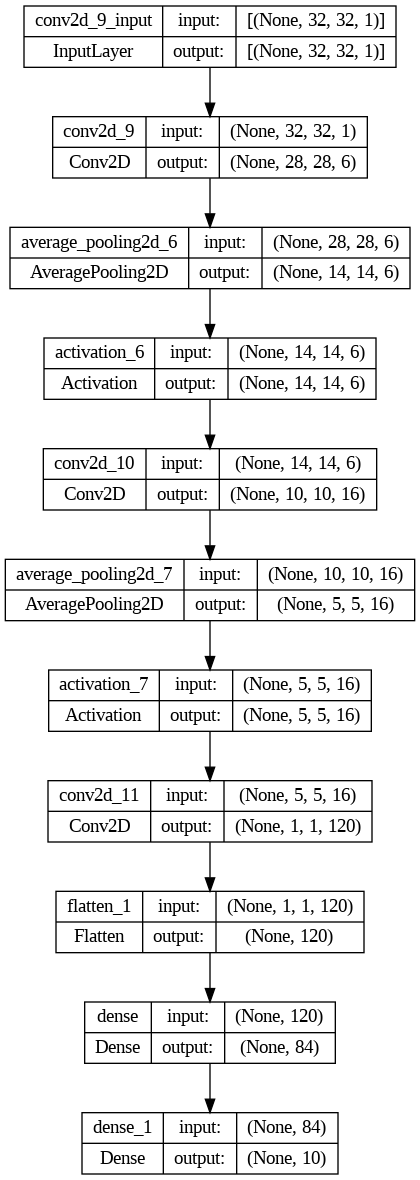

In [21]:
# 모형 시각화
tf.keras.utils.plot_model(model,show_shapes=True)

In [24]:
model.compile(optimizer='SGD',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [25]:
model.fit(X_train,y_train,epochs=20,batch_size=128,validation_split=0.1)

Epoch 1/20
422/422 [==============================] - 35s 80ms/step - loss: 2.3055 - accuracy: 0.1097 - val_loss: 2.3048 - val_accuracy: 0.0992
Epoch 2/20
422/422 [==============================] - 33s 78ms/step - loss: 2.3032 - accuracy: 0.1077 - val_loss: 2.3067 - val_accuracy: 0.1050
Epoch 3/20
422/422 [==============================] - 35s 82ms/step - loss: 2.3007 - accuracy: 0.1143 - val_loss: 2.2975 - val_accuracy: 0.1237
Epoch 4/20
422/422 [==============================] - 31s 74ms/step - loss: 2.2968 - accuracy: 0.1208 - val_loss: 2.2908 - val_accuracy: 0.1932
Epoch 5/20
422/422 [==============================] - 33s 78ms/step - loss: 2.2903 - accuracy: 0.1370 - val_loss: 2.2822 - val_accuracy: 0.1050
Epoch 6/20
422/422 [==============================] - 32s 76ms/step - loss: 2.2748 - accuracy: 0.1782 - val_loss: 2.2610 - val_accuracy: 0.2013
Epoch 7/20
422/422 [==============================] - 34s 82ms/step - loss: 2.2336 - accuracy: 0.2623 - val_loss: 2.1884 - val_accuracy:

In [26]:
# 평가
model.evaluate(X_test,y_test,verbose=0)

[0.368647962808609, 0.8913000226020813]